# **Análisis Exploratorio de Datos (EDA) para el Proyecto Yelp**

El Análisis Exploratorio de Datos (EDA) es el proceso de explorar y comprender los datos antes de realizar análisis más avanzados. En este Jupyter notebook, realizaremos un EDA para los conjuntos de datos relacionados con Yelp, con el objetivo de identificar problemas potenciales y comprender mejor la estructura de los datos. A continuación se describen los pasos que seguiremos:

---

### **1. Exploración Inicial**
- **1.1. Carga del Archivo**: Cargaremos cada archivo en un DataFrame de pandas.
- **1.2. Dimensiones del DataFrame**: Determinaremos cuántas filas y columnas tiene cada DataFrame.
- **1.3. Tipos de Datos**: Revisaremos los tipos de datos para cada columna.
- **1.4. Muestra Rápida**: Observaremos las primeras y últimas filas para tener una idea general del contenido del DataFrame.



### **2. Análisis de Datos Cualitativos**
- **2.1. Valores Nulos**: Identificaremos columnas con valores faltantes y cuántos valores nulos hay.
- **2.2. Estadísticas Básicas**: Utilizaremos `describe()` para obtener estadísticas como media, mediana, desviación estándar, etc.
- **2.3. Valores Únicos**: Contaremos cuántos valores únicos hay en cada columna para entender su diversidad.



### **3. Análisis de Datos Cuantitativos**
- **3.1. Distribuciones**: Crearemos histogramas para visualizar la distribución de las columnas numéricas.
- **3.2. Correlaciones**: Analizaremos las correlaciones entre columnas numéricas para encontrar relaciones significativas.
- **3.3. Detección de Outliers**: Usaremos gráficos como boxplots para detectar valores atípicos.



### **4. Análisis de Datos Categóricos**
- **4.1. Distribución de Categorías**: Verificaremos la frecuencia de las categorías para entender su diversidad.
- **4.2. Relaciones entre Categorías**: Usaremos gráficos de barras para ver cómo se relacionan las categorías con otras variables.



### **5. Preguntas Clave**
- **5.1. Columnas Importantes**: Identificaremos las columnas más relevantes para el análisis futuro.
- **5.2. Patrones y Tendencias**: Buscaremos patrones o tendencias útiles para el análisis posterior.
- **5.3. Correlaciones**: Exploraremos correlaciones entre columnas para identificar relaciones significativas.

---

Al final de este EDA, esperamos tener una comprensión clara de nuestros datos, permitiéndonos planificar y ejecutar análisis más avanzados. Este proceso establecerá una base sólida para el resto del proyecto y asegurará que estamos trabajando con datos limpios y consistentes.

---

In [3]:
# librerías a usar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
# Definimos los tipos de datos para cada columna
data_types = {
    'review_id': 'str',
    'user_id': 'str',
    'business_id': 'str',
    'stars': 'float',
    'useful': 'int',
    'funny': 'int',
    'cool': 'int',
    'text': 'str',
    'date': 'str'  # Se convertirá después a datetime
}

Se utiliza la lectura en chunks que permite procesar partes del archivo sin necesidad de cargar todo en memoria. Se especifica el tipo de cada chunk usando el argumento dtype en read_json().

In [5]:
# Especificamos un tamaño de chunk adecuado
chunk_size = 1000

# Creamos un objeto JsonReader
json_reader = pd.read_json('../../Yelp/raw_data_json/review.json', lines=True, chunksize=chunk_size, dtype=data_types)

# Concatenamos los chunks en un solo DataFrame
df_review = pd.concat((chunk for chunk in json_reader))

In [6]:
# Convertir la columna 'date' a datetime
df_review['date'] = pd.to_datetime(df_review['date'])

In [7]:
# Verificamos los tipos de datos
print(df_review.dtypes)

review_id              object
user_id                object
business_id            object
stars                 float64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ns]
dtype: object


Tipos de Datos

object (para review_id, user_id, business_id, text):
Pandas usa el tipo object para almacenar cadenas de texto y datos mixtos. Las columnas de ID y texto normalmente contienen texto, por lo que object es apropiado.

Para el procesamiento de texto, especialmente en la columna text, se considerararán técnicas de procesamiento de lenguaje natural (NLP) para análisis más detallados, como análisis de sentimientos.

float64 (para stars):
Esta columna representa las calificaciones, que son valores numéricos que podrían tener decimales, haciendo que float64 sea el tipo adecuado para una precisión numérica completa.

int64 (para useful, funny, cool):
Estas columnas representan conteos, que son valores enteros. El tipo int64 es adecuado para asegurar que tienes la capacidad para grandes rangos de valores, lo cual es útil si algunos reviews tienen muchas interacciones.

datetime64[ns] (para date):
Esta columna ha sido correctamente convertida a datetime64[ns], lo cual es ideal para manejar fechas y horas. Este tipo permite una fácil manipulación de fechas y tiempos, como filtrar por períodos específicos, agrupar por mes, día de la semana, etc.

In [8]:
# Guardamos el DataFrame en formato Pickle para posteriores lecturas  --> es mejor trabajarlo en parquet(2.5gb), en pickle(4.5gb) 
# df_review.to_pickle('../../Yelp/raw_data_parquet/review.pickle')

### **1. Exploración Inicial**

In [9]:
# Verificamos las dimensiones del dataframe
print("Dimensiones:", df_review.shape)

Dimensiones: (6990280, 9)


In [10]:
# Mostramos las primeras filas para confirmar la información del dataframe
df_review.head(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


Evidenciamos que las columnas corresponden correctamente a la información del formato json.

### **2. Análisis de Datos Cualitativos**

In [11]:
# Conteo de valores nulos
df_review.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [12]:
# Estadísticas básicas de todas las variables
df_review.describe(include='all').T

In [ ]:
# Valores únicos
print(df_review.nunique())

review_id      6990280
user_id        1987929
business_id     150346
stars                5
useful             259
funny              201
cool               210
text           6974127
date           6885665
dtype: int64


In [ ]:
# Análisis de texto
'''
from collections import Counter

# Asumiendo que 'text' es la columna donde escriben el review
text_words = df_review['text'].dropna().str.lower().str.split()
all_words = [word for sublist in text_words for word in sublist]
word_counts = Counter(all_words)

print(word_counts.most_common(10))
'''

"\nfrom collections import Counter\n\n# Asumiendo que 'text' es la columna donde escriben el review\ntext_words = df_review['text'].dropna().str.lower().str.split()\nall_words = [word for sublist in text_words for word in sublist]\nword_counts = Counter(all_words)\n\nprint(word_counts.most_common(10))\n"

In [ ]:
# Contar reviews por mes
monthly_counts = df_review.resample('M', on='date').count()
print(monthly_counts)

/var/folders/jx/mgrpvh4n2f3b1l736sh02rpw0000gn/T/ipykernel_5577/1426788935.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df_review.resample('M', on='date').count()


            review_id  user_id  business_id  stars  useful  funny   cool  \
date                                                                       
2005-02-28          3        3            3      3       3      3      3   
2005-03-31         74       74           74     74      74     74     74   
2005-04-30         26       26           26     26      26     26     26   
2005-05-31        108      108          108    108     108    108    108   
2005-06-30         38       38           38     38      38     38     38   
...               ...      ...          ...    ...     ...    ...    ...   
2021-09-30      46397    46397        46397  46397   46397  46397  46397   
2021-10-31      49304    49304        49304  49304   49304  49304  49304   
2021-11-30      45224    45224        45224  45224   45224  45224  45224   
2021-12-31      48479    48479        48479  48479   48479  48479  48479   
2022-01-31      31665    31665        31665  31665   31665  31665  31665   

           

In [ ]:
# Promedio de estrellas por mes
monthly_average = df_review.resample('M', on='date')['stars'].mean()
print(monthly_average)

/var/folders/jx/mgrpvh4n2f3b1l736sh02rpw0000gn/T/ipykernel_5577/51597054.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_average = df_review.resample('M', on='date')['stars'].mean()


date
2005-02-28    4.333333
2005-03-31    3.648649
2005-04-30    4.153846
2005-05-31    4.083333
2005-06-30    4.026316
                ...   
2021-09-30    3.615514
2021-10-31    3.654734
2021-11-30    3.675040
2021-12-31    3.673096
2022-01-31    3.704500
Freq: ME, Name: stars, Length: 204, dtype: float64


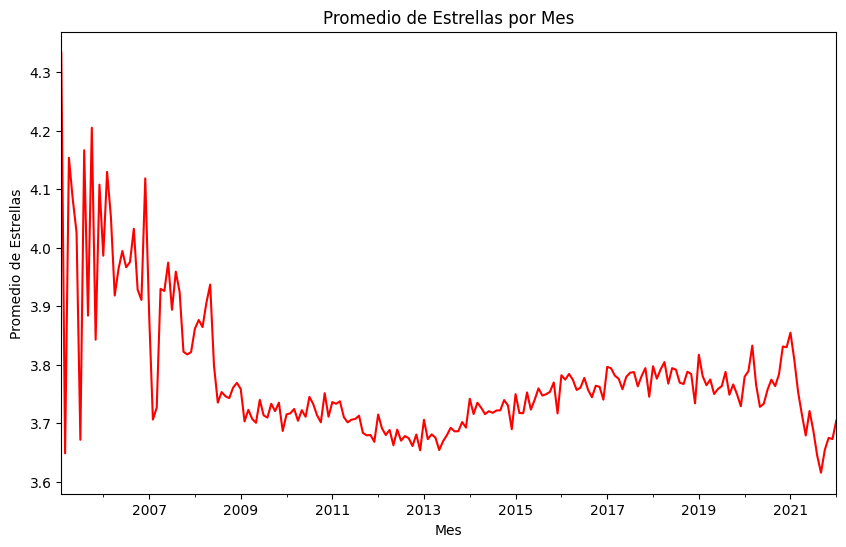

In [ ]:
# Gráfico del promedio de estrellas por mes
monthly_average.plot(kind='line', color='red', figsize=(10, 6))
plt.title('Promedio de Estrellas por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de Estrellas')
plt.show()

/var/folders/jx/mgrpvh4n2f3b1l736sh02rpw0000gn/T/ipykernel_5577/3185623670.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_counts = df_review.resample('Q', on='date')['review_id'].count()


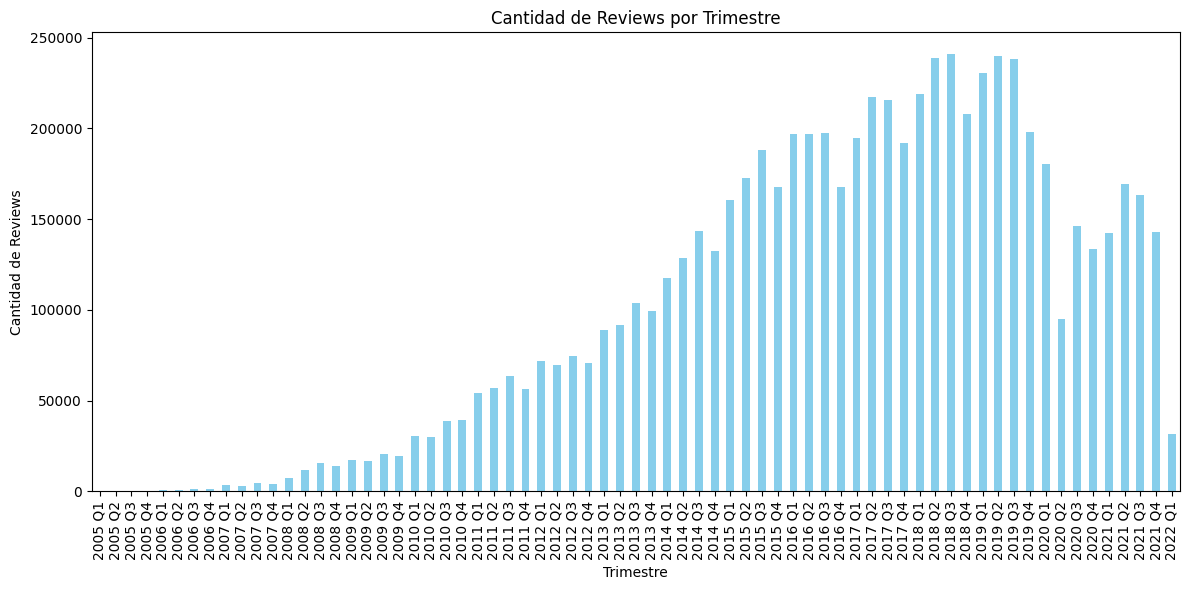

In [ ]:
# Contamos los reviews de cada trimestre
quarterly_counts = df_review.resample('Q', on='date')['review_id'].count()

# Creamos la gráfica
plt.figure(figsize=(12, 6))
quarterly_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Reviews por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Cantidad de Reviews')

# Definimos una función para formatear la etiqueta de la fecha
def format_quarter_label(x):
    if not x: return ''
    q = (x.month - 1) // 3 + 1  # Calcula el trimestre
    return f'{x.year} Q{q}'

# Aplicamos la función a las etiquetas del eje x
labels = [format_quarter_label(x) for x in quarterly_counts.index]
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)  # Asegúrate de rotar las etiquetas para mejor visualización
plt.tight_layout()
plt.show()

### **3. Análisis de Datos Cuantitativos**

#### 3.1. Distribuciones

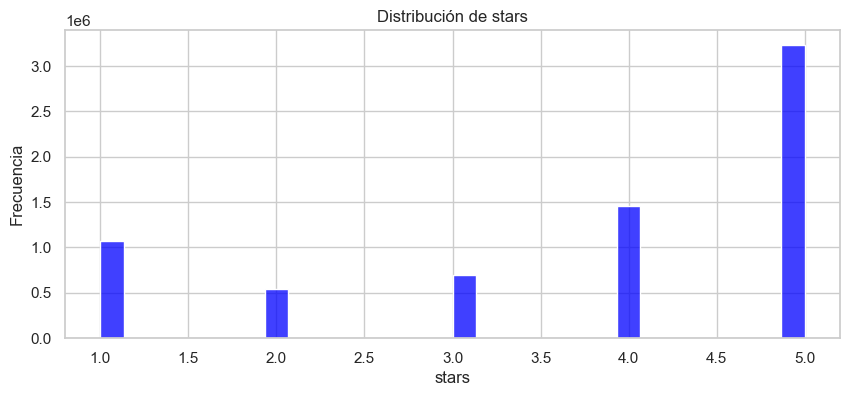

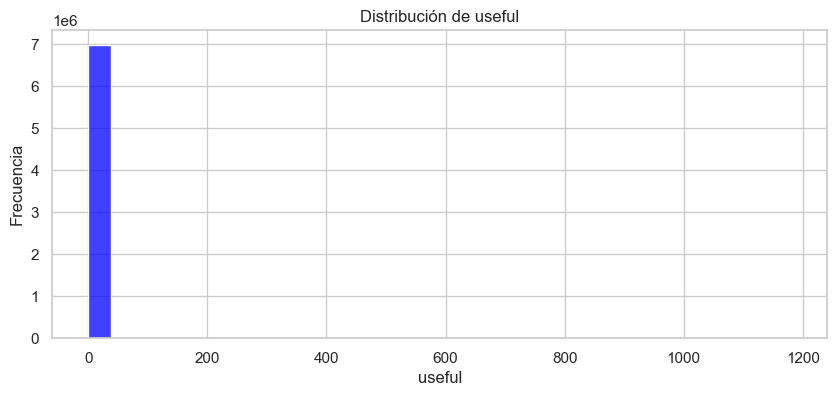

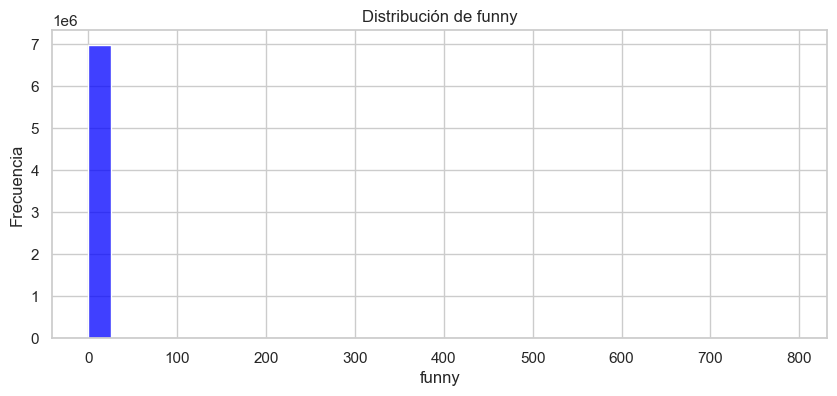

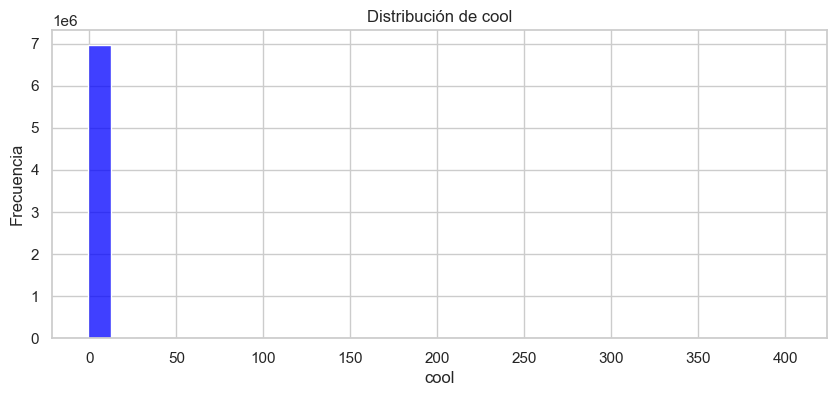

In [ ]:
# Configuración para mejorar la estética de los gráficos
sns.set(style="whitegrid")

# Lista de columnas numéricas para histogramas
numeric_columns = ['stars', 'useful', 'funny', 'cool']

# Crear histogramas para cada columna numérica
for col in numeric_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_review[col], kde=False, bins=30, color='blue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

Como tenemos muchos valores en cero en las reseñas haremos un análisis más profundo de los valores no cero

In [ ]:
# Calcula el porcentaje de ceros en cada columna
for column in ['useful', 'funny', 'cool']:
    zero_count = (df_review[column] == 0).sum()
    total_count = df_review[column].count()
    zero_percentage = (zero_count / total_count) * 100
    print(f'{column}: {zero_percentage:.2f}% de los valores son cero')

useful: 54.94% de los valores son cero
funny: 84.32% de los valores son cero
cool: 76.93% de los valores son cero


Efectivamente encontramos muchos valores en cero de las columnas anteriores, entonces haremos una visualización para valores mayores a 0.

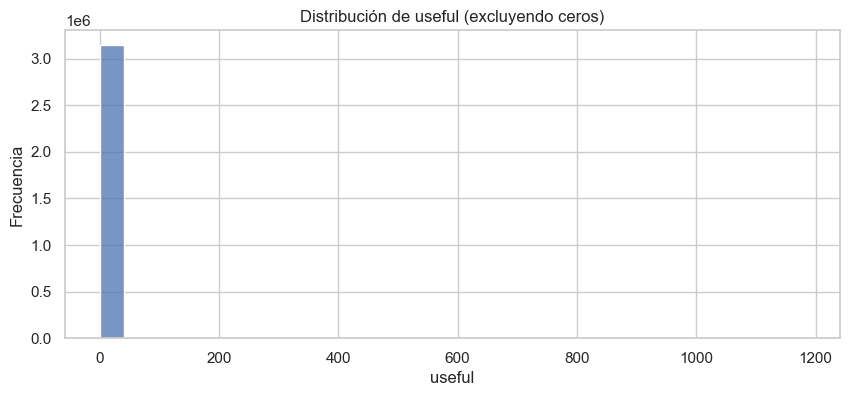

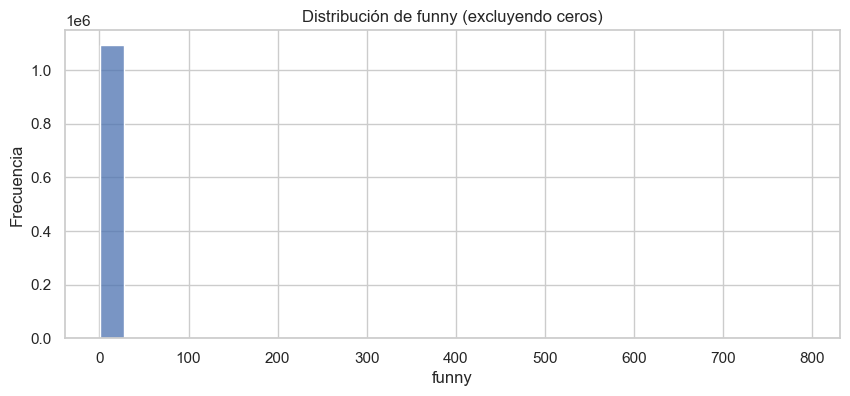

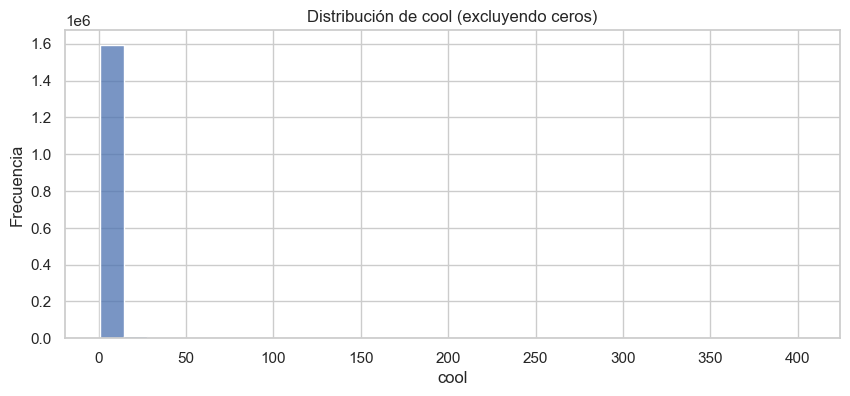

In [ ]:
# Filtrar y visualizar distribuciones de valores no cero
for column in ['useful', 'funny', 'cool']:
    non_zero_data = df_review[df_review[column] > 0][column]
    plt.figure(figsize=(10, 4))
    sns.histplot(non_zero_data, bins=30, kde=False)
    plt.title(f'Distribución de {column} (excluyendo ceros)')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

In [ ]:
# Calcula el porcentaje de ceros en cada columna
for column in ['useful', 'funny', 'cool']:
    zero_count = (df_review[column] < 3).sum()
    total_count = df_review[column].count()
    zero_percentage = (zero_count / total_count) * 100
    print(f'{column}: {zero_percentage:.2f}% de los valores son menores a tres')

useful: 86.80% de los valores son menores a tres
funny: 97.01% de los valores son menores a tres
cool: 95.73% de los valores son menores a tres


Encontramos que la mayoría de los reviews tienen pocas reacciones (<3) y dado el número de registros entonces no vemos una distribución clara del número de reacciones para cada tipo de reacción. Analizaremos posteriormente en los outliers. 

#### 3.2. Correlaciones

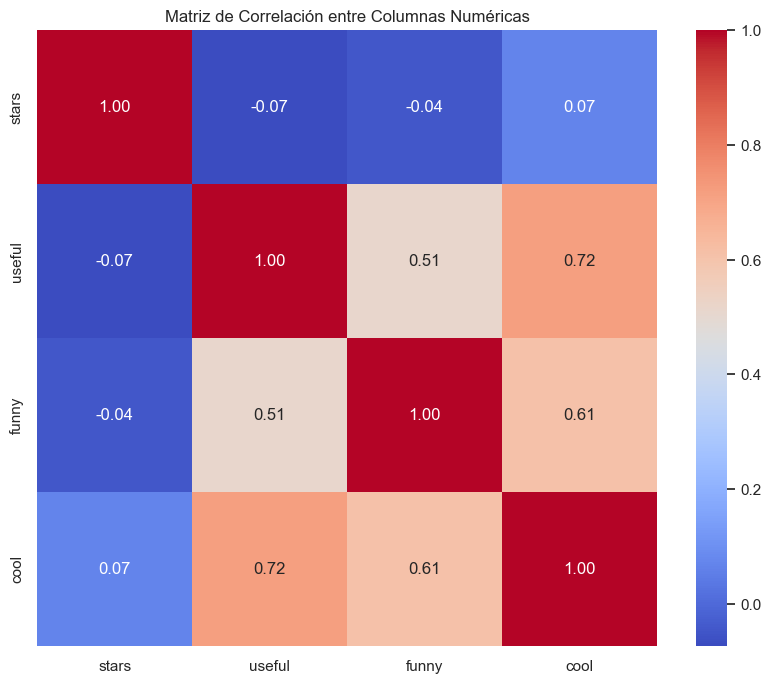

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_review[numeric_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación entre Columnas Numéricas')
plt.show()

Encontramos poca relación de las reacciones con las estrellas, esto posiblemente debido a que no depende de la evaluación de estrellas sino de la calidad del comentario que contiene el campo Text. Lo que si parece relacionarse es que un comentario que sea useful (útil) y cool puede tener una correlación positiva bastante alta y moderada entre funny (divertido) y cool.

#### 3.3. Detección de outliers

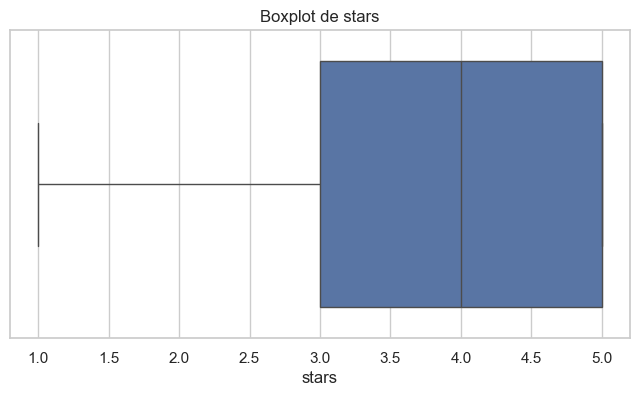

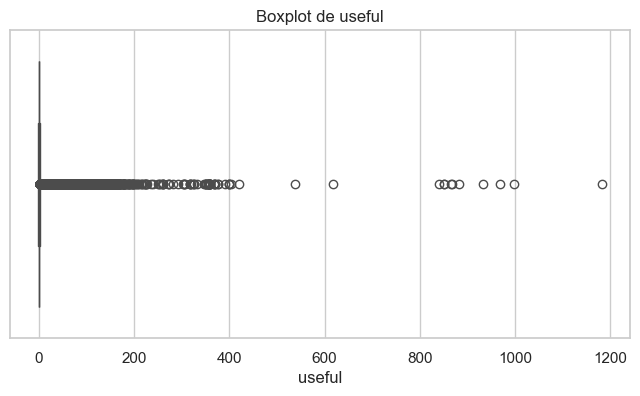

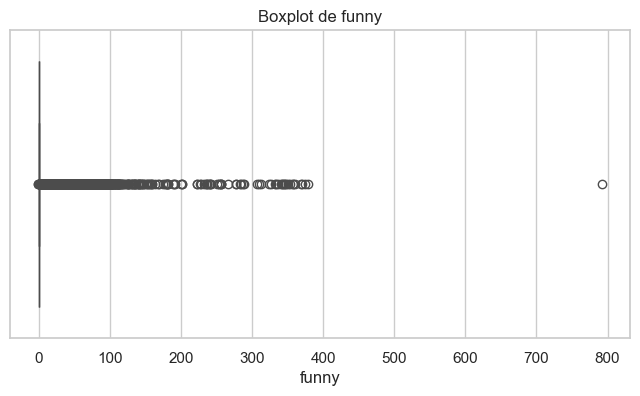

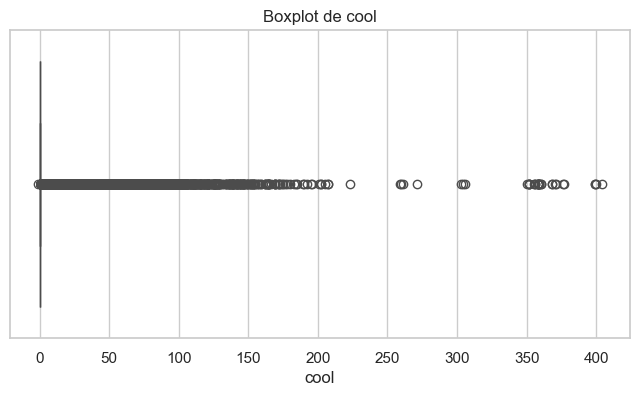

In [ ]:
# Crear boxplots para cada columna numérica
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_review[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

En los outliers si podemos apreciar que hay algunos comentarios que tienen muchas reacciones, muy alejados de la normal. Tendremos esto en cuenta a la hora de evaluar comentarios y el manejo de estas reacciones atípicas para los análisis y recomendaciones.

#### 3.4. Análisis bivariado

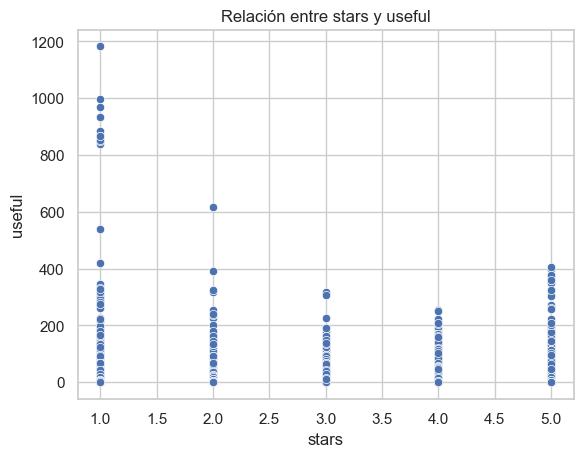

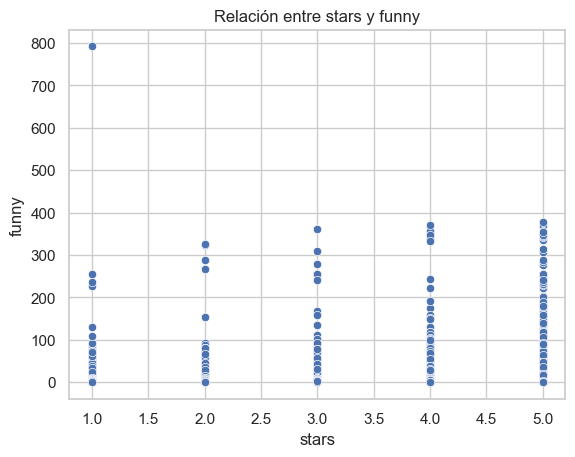

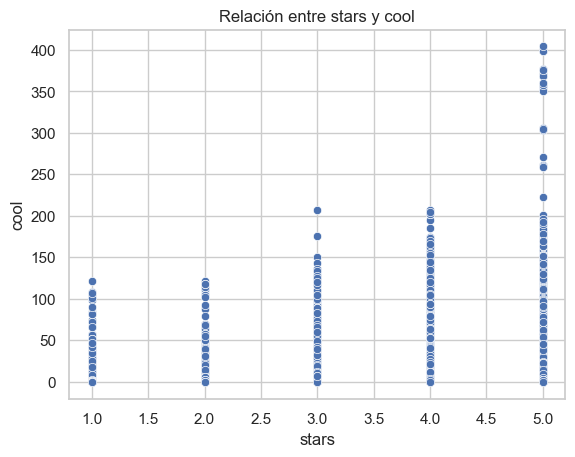

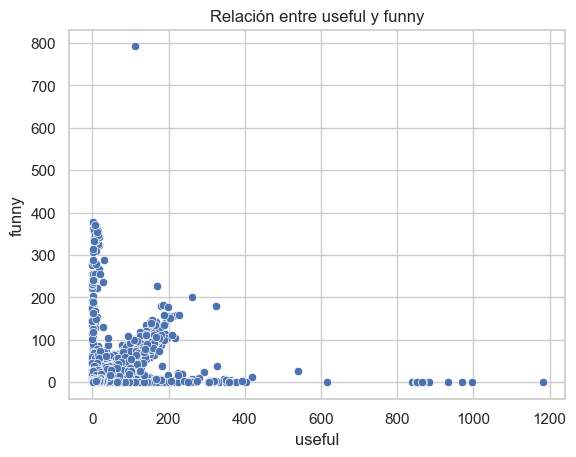

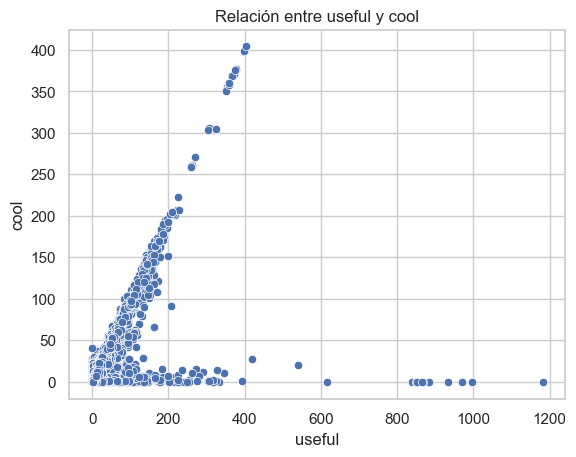

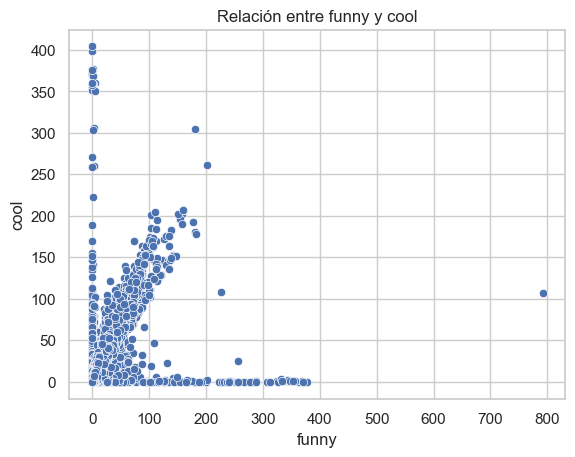

In [ ]:
# Crear scatter plots para cada combinación de variables numéricas
for i in range(len(numeric_columns)):
    for j in range(i + 1, len(numeric_columns)):
        sns.scatterplot(data=df_review, x=numeric_columns[i], y=numeric_columns[j])
        plt.title(f'Relación entre {numeric_columns[i]} y {numeric_columns[j]}')
        plt.xlabel(numeric_columns[i])
        plt.ylabel(numeric_columns[j])
        plt.show()

### **4. Análisis de Sentimiento Detallado**

In [ ]:
# Aplicamos el análisis de sentimiento usando VaderSentiment en el campo Text.
analyzer = SentimentIntensityAnalyzer()
df_review['sentiment_score'] = df_review['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Visualización de la distribución de los puntajes de sentimiento
plt.figure(figsize=(10, 6))
sns.histplot(df_review['sentiment_score'], kde=True, color='blue')
plt.title('Distribución de Puntajes de Sentimiento')
plt.xlabel('Puntaje de Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

KeyboardInterrupt: 

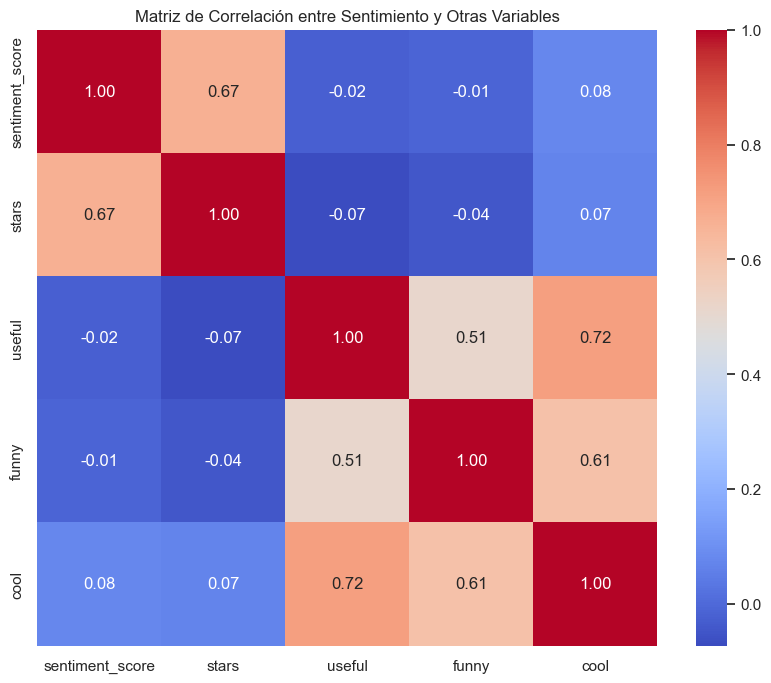

In [ ]:
# Correlación de puntajes de sentimiento con otras variables
correlation_matrix = df_review[['sentiment_score', 'stars', 'useful', 'funny', 'cool']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Sentimiento y Otras Variables')
plt.show()

Claramente hay una correlación positiva entre las estrellas y el análisis de sentimiento basado en los comentarios del texto. Como no todos los que califican hacen comentarios en el campo text esta correlación no es mayor.

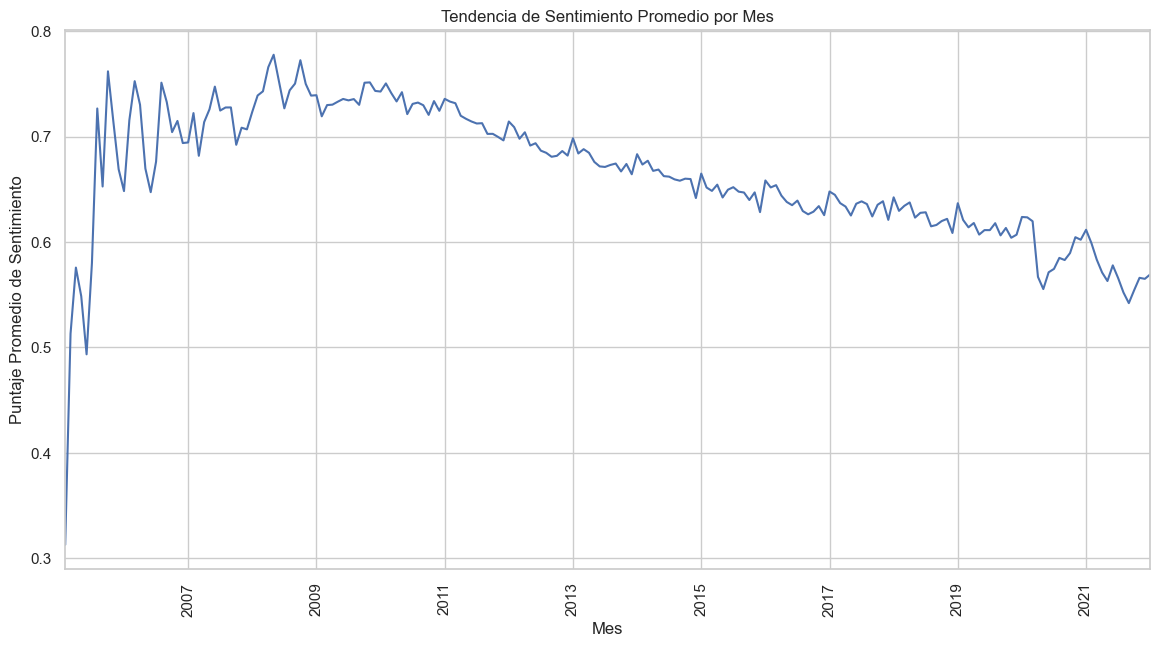

In [ ]:
# Agregamos una columna de año y mes y luego graficar el sentimiento promedio por mes:
df_review['year_month'] = df_review['date'].dt.to_period('M')

# Media de sentimiento por mes
monthly_sentiment = df_review.groupby('year_month')['sentiment_score'].mean()

plt.figure(figsize=(14, 7))
monthly_sentiment.plot()
plt.title('Tendencia de Sentimiento Promedio por Mes')
plt.xlabel('Mes')
plt.ylabel('Puntaje Promedio de Sentimiento')
plt.xticks(rotation=90)
plt.show()

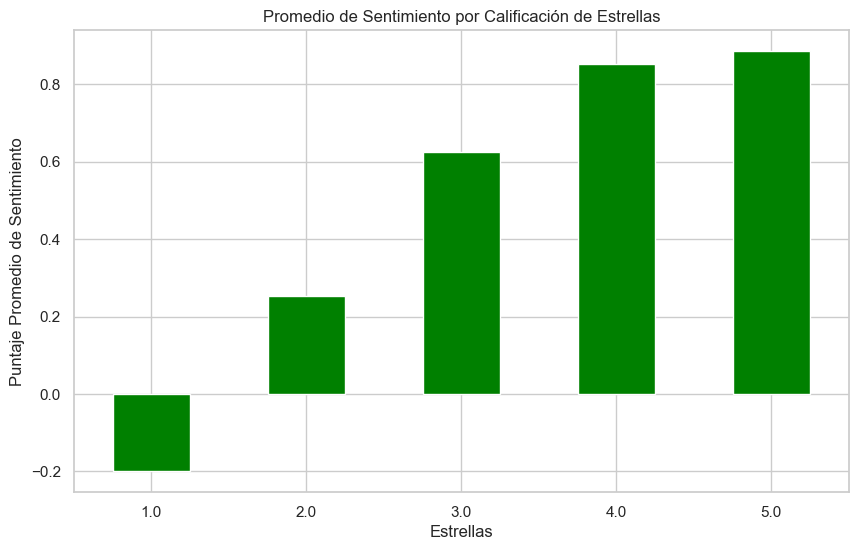

In [ ]:
# Comprobamos las estrellas con el análisis de sentimiento
star_sentiment = df_review.groupby('stars')['sentiment_score'].mean()

plt.figure(figsize=(10, 6))
star_sentiment.plot(kind='bar', color='green')
plt.title('Promedio de Sentimiento por Calificación de Estrellas')
plt.xlabel('Estrellas')
plt.ylabel('Puntaje Promedio de Sentimiento')
plt.xticks(rotation=0)
plt.show()